In [8]:
!nvidia-smi

Mon Jul 18 03:23:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    25W /  70W |    346MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Loading deep learning algorithm
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import keras
#import keras.backend as K
#from keras.models import Sequential
#from keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

IMAGE_SIZE = [224,224]
CLASS=2
inception = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#model = VGG16(weights='imagenet', include_top=False)
for layer in inception.layers:
    layer.trainable = False
#folders = glob('C:\rafid\guava disease research\k_guava\train_image/*')
x = Flatten()(inception.output)
prediction = Dense(CLASS, activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)
adam = keras.optimizers.Adam(lr = 0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer = adam,
  metrics=['accuracy']
)
print("\n\n")
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                        

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 conv2_block4_2_conv (Conv2D)   (None, 56, 56, 32)   36864       ['conv2_block4_1_relu[0][0]']    
                                                                                                  
 conv2_block4_concat (Concatena  (None, 56, 56, 192)  0          ['conv2_block3_concat[0][0]',    
 te)                                                              'conv2_block4_2_conv[0][0]']    
                                                                                                  
 conv2_block5_0_bn (BatchNormal  (None, 56, 56, 192)  768        ['conv2_block4_concat[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block5_0_relu (Activatio  (None, 56, 56, 192)  0          ['conv2_block5_0_bn[0][0]']      
 n)                                                                                               
          

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
val_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /train',
                                                 target_size = (224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
val_set = val_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /val',
                                            target_size = (224,224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset Taka/split /test',
                                            target_size = (224,224),
                                            batch_size = 1,
                                            class_mode = 'categorical')
print("\n\n")
model.optimizer.get_config()

Found 516 images belonging to 2 classes.
Found 147 images belonging to 2 classes.
Found 75 images belonging to 2 classes.





{'amsgrad': False,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'decay': 0.0,
 'epsilon': 1e-07,
 'learning_rate': 0.001,
 'name': 'Adam'}

In [12]:
filepath = "/content/drive/MyDrive/Dataset Taka/densenet121/highest_val2.h5"
filepath2 = "/content/drive/MyDrive/Dataset Taka/densenet121/highest_train2.h5"
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1,
                             save_best_only=True, mode='max')
checkpoint2 = ModelCheckpoint(filepath2, monitor='accuracy', verbose=1,
                             save_best_only=True, mode='max')
callbacks_list = [checkpoint1,checkpoint2]
r = model.fit_generator(
    training_set,
    epochs=16,
    validation_data=val_set,
    steps_per_epoch=len(training_set),
    validation_steps=len(val_set),
    callbacks=callbacks_list
)
model.save_weights("/content/drive/MyDrive/Dataset Taka/densenet121/end2.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/16
17/17 [==============================] - ETA: 0s - loss: 0.8285 - accuracy: 0.8411 
Epoch 1: val_accuracy improved from -inf to 0.91837, saving model to /content/drive/MyDrive/Dataset Taka/densenet121/highest_val2.h5

Epoch 1: accuracy improved from -inf to 0.84109, saving model to /content/drive/MyDrive/Dataset Taka/densenet121/highest_train2.h5
17/17 [==============================] - 729s 42s/step - loss: 0.8285 - accuracy: 0.8411 - val_loss: 0.5793 - val_accuracy: 0.9184
Epoch 2/16
17/17 [==============================] - ETA: 0s - loss: 0.4091 - accuracy: 0.9031
Epoch 2: val_accuracy improved from 0.91837 to 0.94558, saving model to /content/drive/MyDrive/Dataset Taka/densenet121/highest_val2.h5

Epoch 2: accuracy improved from 0.84109 to 0.90310, saving model to /content/drive/MyDrive/Dataset Taka/densenet121/highest_train2.h5
17/17 [==============================] - 174s 10s/step - loss: 0.4091 - accuracy: 0.9031 - val_loss: 0.5379 - val_accuracy: 0.9456
Epoch 3/16
17

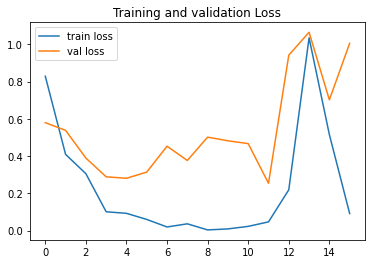

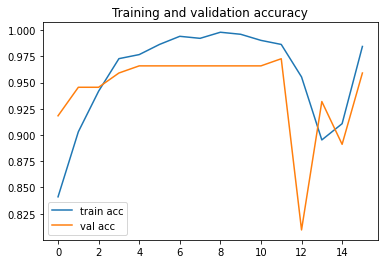

<Figure size 432x288 with 0 Axes>

In [13]:
#plot of accuracy and loss

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.title('Training and validation Loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [14]:
#evaluating the model (test acc)
#batch size = 32
model.load_weights('/content/drive/MyDrive/Dataset Taka/densenet121/highest_val2.h5')
preds = model.evaluate_generator(test_set)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  after removing the cwd from sys.path.


Loss = 0.11664063483476639
Test Accuracy = 0.9866666793823242


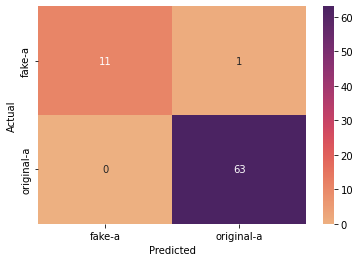

In [15]:
#confusion matrix

#you have to set test bath size=1 before running the cell
import pandas as pd
import seaborn as sn
import tensorflow as tf
model.load_weights('/content/drive/MyDrive/Dataset Taka/densenet121/highest_val2.h5')
filenames=test_set.filenames
nb_samples=len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range (nb_samples):
    X_test,Y_test = test_set.next()
    y_prob.append(model.predict(X_test))
    y_act.append(Y_test)
predicted_class=[list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(training_set.class_indices.keys())[i.argmax()]for i in y_act]
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])
import matplotlib.pyplot as plt
sn.heatmap(confusion_matrix,cmap='flare', annot=True, fmt='d')
plt.show()
#plt.savefig('/content/drive/MyDrive/model weights/vgg16_AugGfb_split1_maxval_3')

In [16]:
lst=[r.history['loss'],r.history['val_loss'],r.history['accuracy'],r.history['val_accuracy']]

In [17]:
print(lst)

[[0.8284570574760437, 0.40910065174102783, 0.30533111095428467, 0.10089151561260223, 0.09254434704780579, 0.059766173362731934, 0.01938581094145775, 0.03620225936174393, 0.003501276485621929, 0.008890820667147636, 0.022517554461956024, 0.04661045968532562, 0.21880146861076355, 1.034688949584961, 0.5152724981307983, 0.09150432795286179], [0.5792982578277588, 0.5378835201263428, 0.3893653452396393, 0.28850460052490234, 0.2807327210903168, 0.3140018880367279, 0.45293089747428894, 0.3763250708580017, 0.5015461444854736, 0.48195016384124756, 0.46685153245925903, 0.25387585163116455, 0.9415658712387085, 1.0646544694900513, 0.7017244100570679, 1.0051838159561157], [0.8410852551460266, 0.9031007885932922, 0.9418604373931885, 0.9728682041168213, 0.9767441749572754, 0.9864341020584106, 0.9941860437393188, 0.9922480583190918, 0.998062014579773, 0.9961240291595459, 0.9903100728988647, 0.9864341020584106, 0.9554263353347778, 0.895348846912384, 0.9108527302742004, 0.9844961166381836], [0.91836732625